## Health Risk Prediction

###
### Steps I need to follow :

- **Problem Understanding**
- **Dataset Selection**
- **Data Analysis (EDA)**
- **Data Cleaning**
- **Data Preprocessing**
- **Feature Understanding**
- **ML Model Basics**
- **Training the Model**
- **Evaluation**
- **Interpretation of Results**
- **Mini Documentation (for resume + interview)**

### Step - 1 : Problem Understanding

#### What is our problem?
##### We want to predict health risk of a person based on details like:
##### 1)Age
##### 2)BMI
##### 3)Blood Pressure
##### 4)Glucose
##### 5)Lifestyle factors, etc.
#### What does “Health Risk Prediction” mean?
##### It means:
##### Using past data of people → learn patterns → predict whether a new person is at low / medium / high risk.

### Step - 2 : DataSet Selection

#### Note : “A bad dataset can destroy a good ML model.”

#### DataSet Name : "Pima Indians Diabetes Dataset"
#### Why THIS Dataset?             
#### 1)Beginner-friendly
#### 2)Real health data
#### 3)Clean size	        
#### 4)Popular	        
#### 5)Binary prediction
#### Each row = one person
#### Each column = health measurement
#### Features (Inputs)
#### 1)Pregnancies
#### 2)Glucose
#### 3)BloodPressure
#### 4)SkinThickness
#### 5)Insulin
#### 6)BMI
#### 7)DiabetesPedigreeFunction
#### 8)Age
#### Target (Output)
#### 1)Outcome
#### 0 → No Diabetes (Low Risk)
#### 1 → Diabetes (High Risk)

### Step - 3 : DataAnalysis(EDA)
#### What is EDA? (Exploratory Data Analysis)
##### Systematically analyzing data to understand its structure, patterns, distributions, and problems before building any model.
##### Think of EDA as:
##### 🩺 Health check of the dataset
##### 🔍 Finding hidden issues
##### 🧠 Developing intuition about data

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# STEP-3.1: Load Dataset & Understand Structure
data = pd.read_csv("/content/diabetes.csv")
data.shape # rows -> number of people & columns -> features + target

(768, 9)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns # all are in numeric format so no need to do encoding

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### WHY analyze target first?
#### Because:
#### It tells us what problem we’re solving
#### It reveals class imbalance
#### It affects model choice & evaluation

In [ ]:
# STEP-3.2: Target Variable Analysis
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


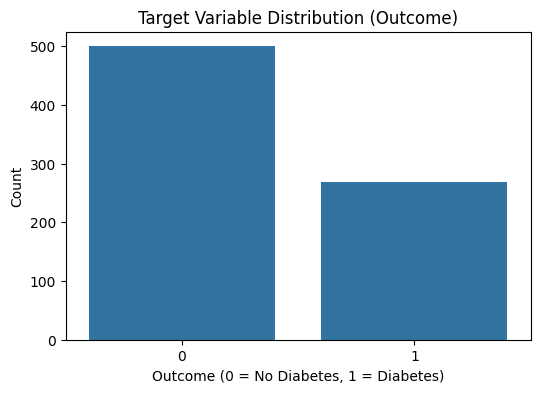

In [ ]:
# Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=data)
plt.title("Target Variable Distribution (Outcome)")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()


### Insight:
#### 0 -> Non - Diabetic
#### 1 -> Diabetic
#### As per above analysis, it says Non - Diabetic > Diabetic persons and dataset is imbalanced

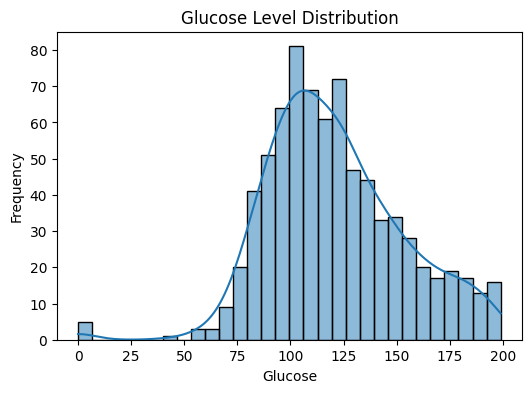

In [ ]:
# STEP-3.3: Feature Distribution Analysis
# 1) Glucose
plt.figure(figsize=(6,4))
sns.histplot(data['Glucose'], bins=30, kde=True)
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()


#### The Graph is touching x-axis at 0 it means there are no zero values in the glucose column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the glucose. So Treat them as Missing values.

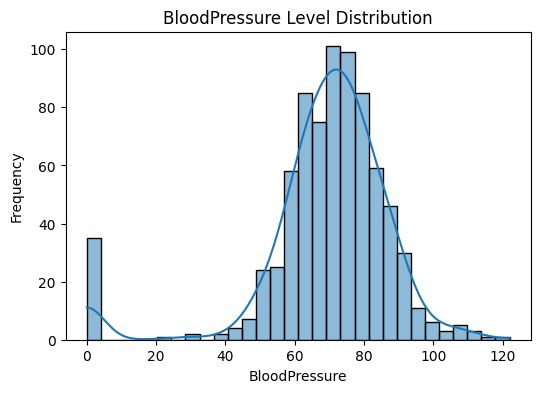

In [ ]:
# 2) BloodPressure
plt.figure(figsize=(6,4))
sns.histplot(data['BloodPressure'], bins=30, kde=True)
plt.title("BloodPressure Level Distribution")
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the BloodPressure column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the BloodPressure. So Treat them as Missing values.

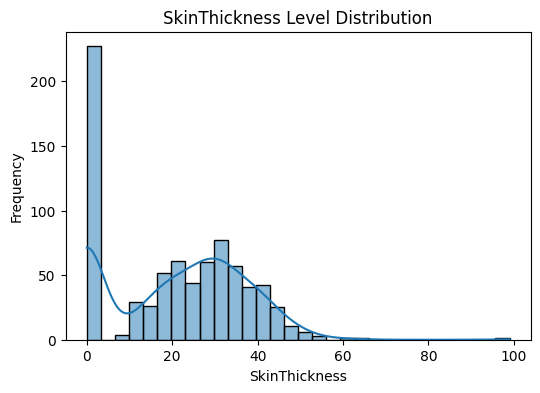

In [ ]:
# 3) SkinThickness
plt.figure(figsize=(6,4))
sns.histplot(data['SkinThickness'], bins=30, kde=True)
plt.title("SkinThickness Level Distribution")
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the SkinThickness column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the SkinThickness. So Treat them as Missing values.

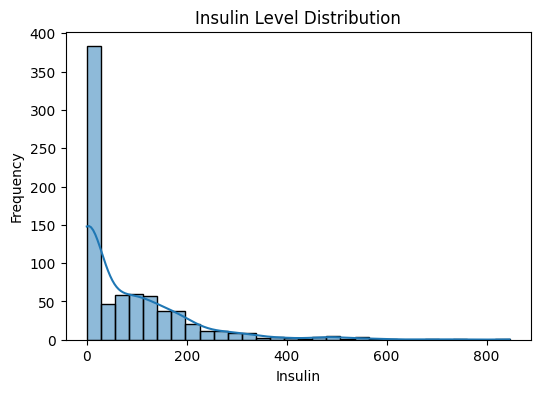

In [ ]:
# 4) Insulin
plt.figure(figsize=(6,4))
sns.histplot(data['Insulin'], bins=30, kde=True)
plt.title("Insulin Level Distribution")
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the Insulin column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the Insulin. So Treat them as Missing values.

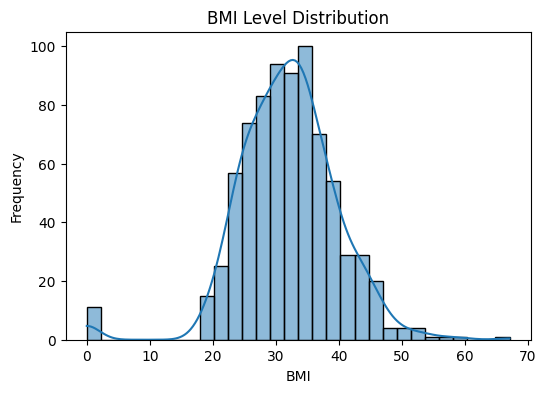

In [ ]:
# 5) BMI
plt.figure(figsize=(6,4))
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title("BMI Level Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the BMI column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the BMI. So Treat them as Missing values.

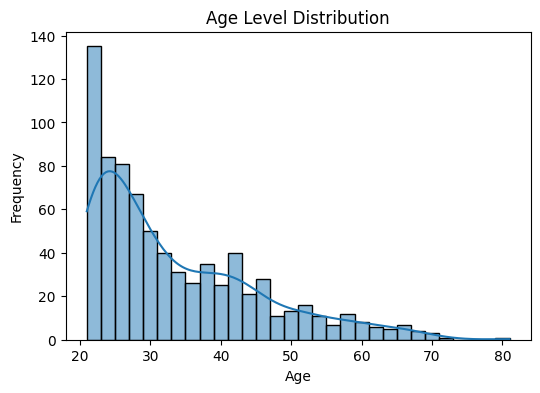

In [ ]:
# 6) Age
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Level Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### There are no 0 values in age column. So we can't treat them as missing values.

In [ ]:
# STEP-3.4 : Replace 0 with Nan Values
invalid_zero_cols = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]
data[invalid_zero_cols] = data[invalid_zero_cols].replace(0, np.nan)

### Insight:
##### In Columns where 0 is medically impossible.
##### So if we donot replace 0 with Nan ML model will accept 0 and treat as a real value, But in medical context 0 is invalid, keeping it will corrupt patterns.
##### So Now we are replacing 0 with Nan so that ML model cannot work with Nan values.

In [ ]:
# STEP-3.5: Missing Value Analysis & Imputation
data.isnull().sum() # checks Null Values

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### After converting zeros to NaN:
#### 1)ML models cannot work with NaN
#### 2)Dropping rows will lose valuable medical data
#### 3)So we must fill missing values intelligently

#### Distribution = how data values are spread or arranged.
#### A normal distribution looks like a bell shape 🔔.
#### When data is not balanced, it is called skewed data.
#### Outliers = values that are very far from most data.
#### Mean is affected by outliers.(This Lies)
#### Median is not affected by outliers.(This tells the truth)

In [ ]:
data[invalid_zero_cols] = data[invalid_zero_cols].fillna(data[invalid_zero_cols].median())

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


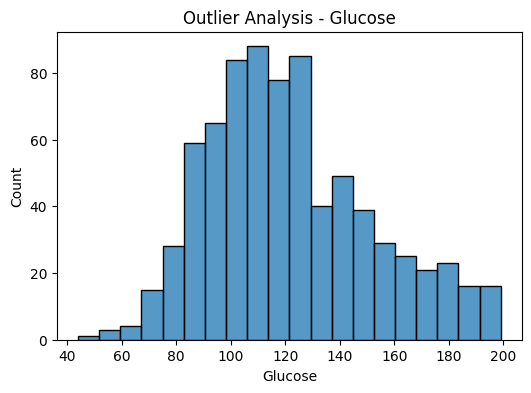

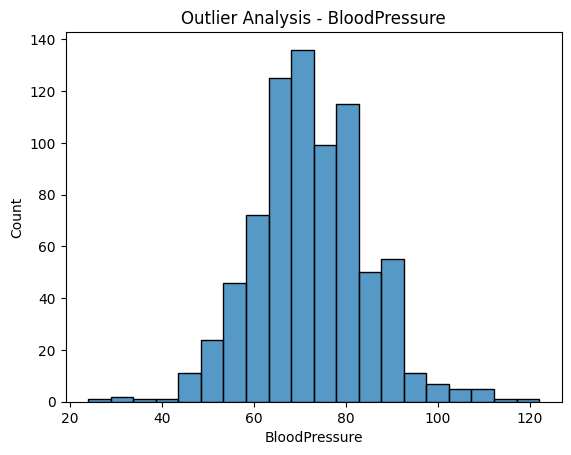

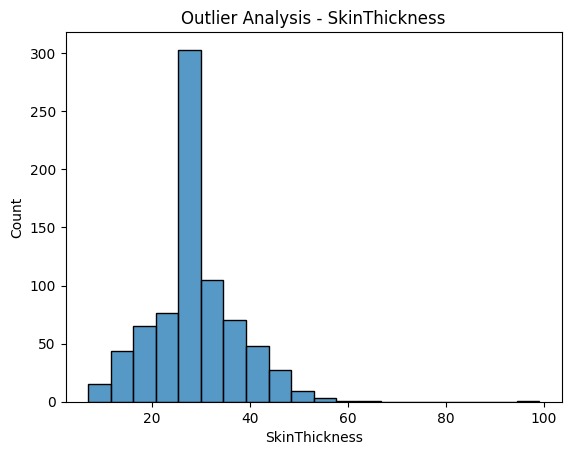

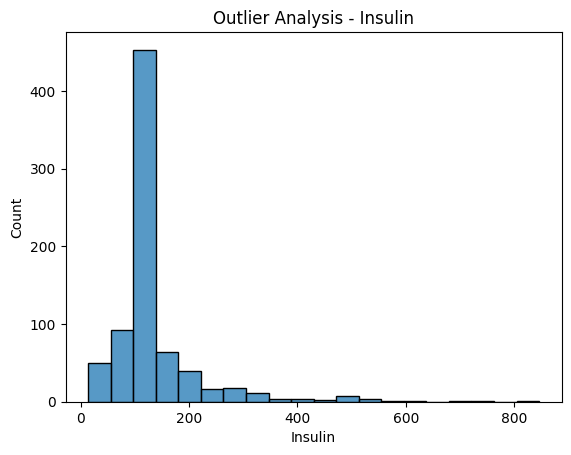

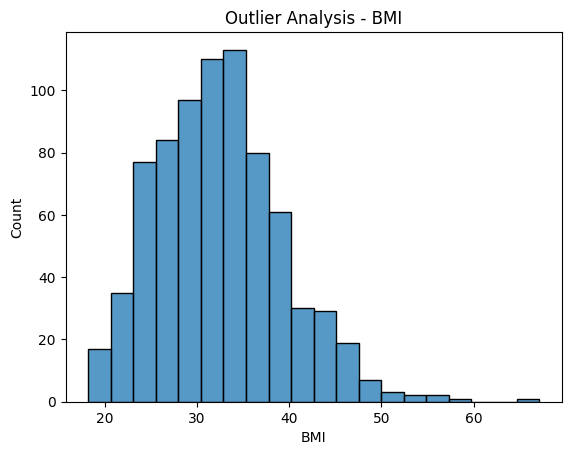

In [ ]:
# STEP-3.6 : OUTLIER ANALYSIS
plt.figure(figsize=(6,4))
for i in invalid_zero_cols:
  sns.histplot(data=data,x=i,bins=20)
  plt.title(f"Outlier Analysis - {i}")
  plt.xlabel(f"{i}")
  plt.show()


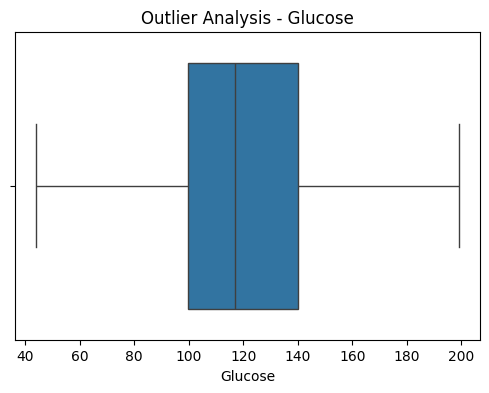

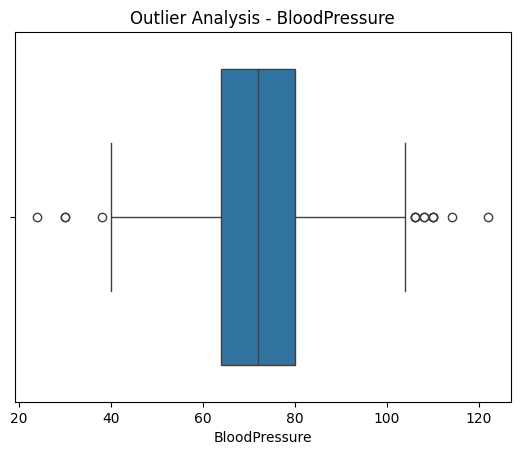

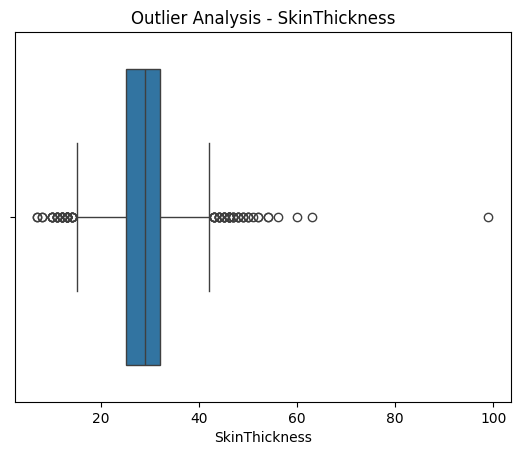

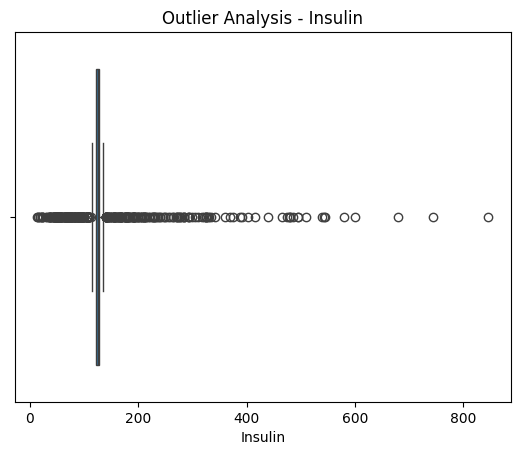

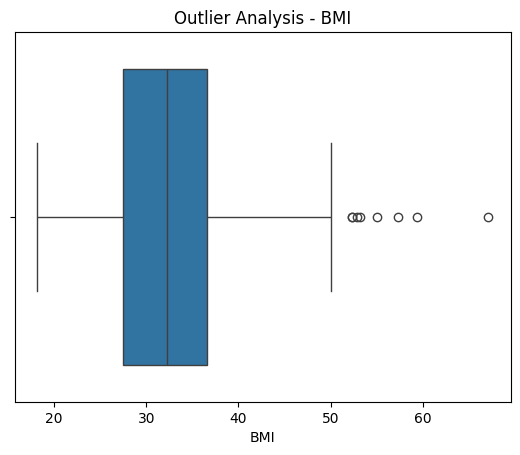

In [ ]:
# 1) Using BoxPlot
plt.figure(figsize=(6,4))
for i in invalid_zero_cols:
  sns.boxplot(data=data,x=i)
  plt.title(f"Outlier Analysis - {i}")
  plt.xlabel(f"{i}")
  plt.show()


#### 1) Boxplot is a visual representation of outliers
#### 2)IQR focuses on the middle 50% of the data, ignoring extreme values.
#### IQR = Q3 − Q1 (75th percentile − 25th percentile)  ( IQR behavemedian-like (robust), but it is not the median itself ), Works well for skewed data, Best choice for medical datasets
#### 3)Z-score tells how far a value is from the mean in terms of standard deviation units.
#### Z-score depends on mean
#### So Z-score becomes unreliable for skewed medical data

#### Quartile means dividing data into 4 equal parts.
#### Q1 is the middle of the lower half of data.
#### Q3 is the middle of the upper half of data.
#### We are not removing outliers using IQR because, in medical data, they represent high-risk patients, and removing them has no point.

In [ ]:
# STEP-3.7 : FEATURE vs TARGET ANALYSIS